In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import dataset
df = pd.read_csv("/content/drive/MyDrive/DL Project/Dataset/stanford_df_rectified.csv")
df.head()

,Image_name,Paragraph,train,test,url,val
0,2356347,A large building with bars on the windows in f...,False,True,https://cs.stanford.edu/people/rak248/VG_100K/...,False
1,2317429,A white round plate is on a table with a plast...,True,False,https://cs.stanford.edu/people/rak248/VG_100K/...,False
2,2414610,A woman in a blue tennis outfit stands on a gr...,False,True,https://cs.stanford.edu/people/rak248/VG_100K_...,False
3,2365091,A large red and white train is traveling on tr...,True,False,https://cs.stanford.edu/people/rak248/VG_100K/...,False
4,2383120,A very clean and tidy a bathroom. Everything i...,True,False,https://cs.stanford.edu/people/rak248/VG_100K_...,False


In [ ]:
print(f"Number of training samples  :{len(df[df['train']==True])}")
print(f"Number of validation samples:{len(df[df['val']==True])}")
print(f"Number of test samples      :{len(df[df['test']==True])}")

Number of training samples  :14579
Number of validation samples:2490
Number of test samples      :2492


In [ ]:
train = df[df['train']==True]
train_captions = train.Paragraph.to_list()
train_captions[:5]

['A white round plate is on a table with a plastic tablecloth on it.  Two foil covered food halves are on the white plate along with a serving of golden yellow french fries.  Next to the white plate in a short,  topless, plastic container is a white sauce.  Diagonal to the white plate are the edges of several other stacked plates.  There are black shadows reflected on the table.',
 'A large red and white train is traveling on tracks in a what looks to be a rural area. There are trees and hills in the background and the ground looks dry. The train has many large windows for the passengers to look out of. The train is mostly white with red on the front upper part of the train and red stripes and trim on the sides. The roof of the train is grey.',
 'A very clean and tidy a bathroom. Everything is a neat porcelain white. This bathroom is both retro and modern.',
 'There are four small pizzas on a brown wooden plate.  There are greens in the center for garnish.  The small pizzas have brocco

In [ ]:
def preprocessCaptions(captions):
  modified_caption = list()
  for caption in captions:
    modified = caption.lower().replace('.',' .').replace("'","").replace(",","")
    modified_caption.append(modified)
  return modified_caption

train_captions = preprocessCaptions(train_captions)

In [ ]:
# count number of tokens in the corpus 
count_words = {}
for caption in train_captions:
    for word in caption.split():
        if word not in count_words:
            count_words[word] = 1
        else:
            count_words[word] += 1

count_words

{'a': 61172,
 'white': 13064,
 'round': 334,
 'plate': 1571,
 'is': 54468,
 'on': 27613,
 'table': 2903,
 'with': 10722,
 'plastic': 318,
 'tablecloth': 72,
 'it': 6833,
 '.': 82635,
 'two': 4335,
 'foil': 33,
 'covered': 892,
 'food': 779,
 'halves': 9,
 'are': 21276,
 'the': 90411,
 'along': 591,
 'serving': 24,
 'of': 25555,
 'golden': 140,
 'yellow': 2683,
 'french': 38,
 'fries': 55,
 'next': 2590,
 'to': 8599,
 'in': 20101,
 'short': 819,
 'topless': 3,
 'container': 181,
 'sauce': 182,
 'diagonal': 11,
 'edges': 60,
 'several': 750,
 'other': 2207,
 'stacked': 73,
 'plates': 305,
 'there': 20104,
 'black': 8333,
 'shadows': 154,
 'reflected': 55,
 'large': 3185,
 'red': 4470,
 'and': 25704,
 'train': 2102,
 'traveling': 88,
 'tracks': 735,
 'what': 194,
 'looks': 762,
 'be': 2485,
 'rural': 14,
 'area': 816,
 'trees': 2832,
 'hills': 89,
 'background': 1603,
 'ground': 1615,
 'dry': 187,
 'has': 8780,
 'many': 1210,
 'windows': 871,
 'for': 759,
 'passengers': 80,
 'look': 257,


In [ ]:
tokenCount = pd.DataFrame(columns=['token','count'])
tokenCount.iloc[:,0] = count_words.keys()
tokenCount.iloc[:,1] = count_words.values()
tokenCount.head()

,token,count
0,a,61172
1,white,13064
2,round,334
3,plate,1571
4,is,54468


In [ ]:
tokenCount = tokenCount.sort_values(['count'],ascending=False)
tokenCount.head(10)

,token,count
18,the,90411
11,.,82635
0,a,61172
4,is,54468
5,on,27613
45,and,25704
21,of,25555
17,are,21276
39,there,20104
28,in,20101


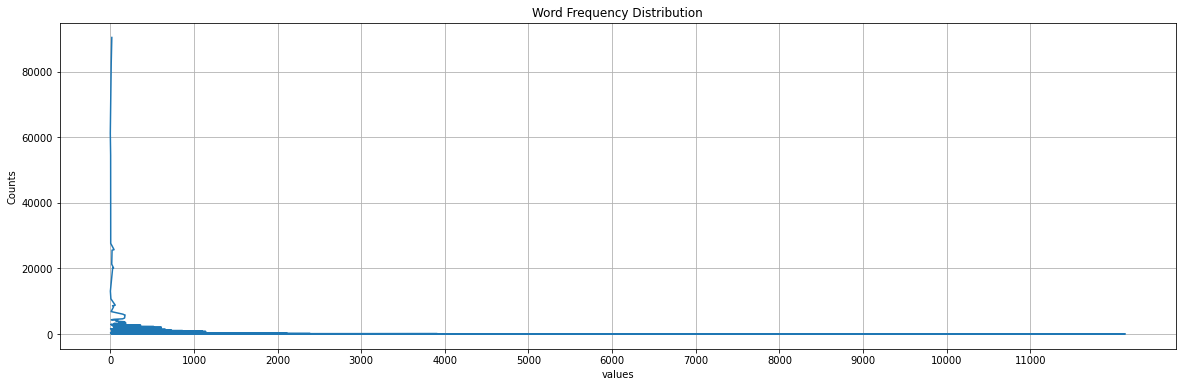

In [ ]:
tokenCount["count"].plot(grid=True, figsize=(20,6))
plt.title("Word Frequency Distribution")
plt.xlabel("values")
plt.xticks(np.arange(0,12000,1000))
plt.ylabel('Counts')
plt.show()

Text(0.5, 1.0, 'Word Frequency destribution of 50 frequent words')

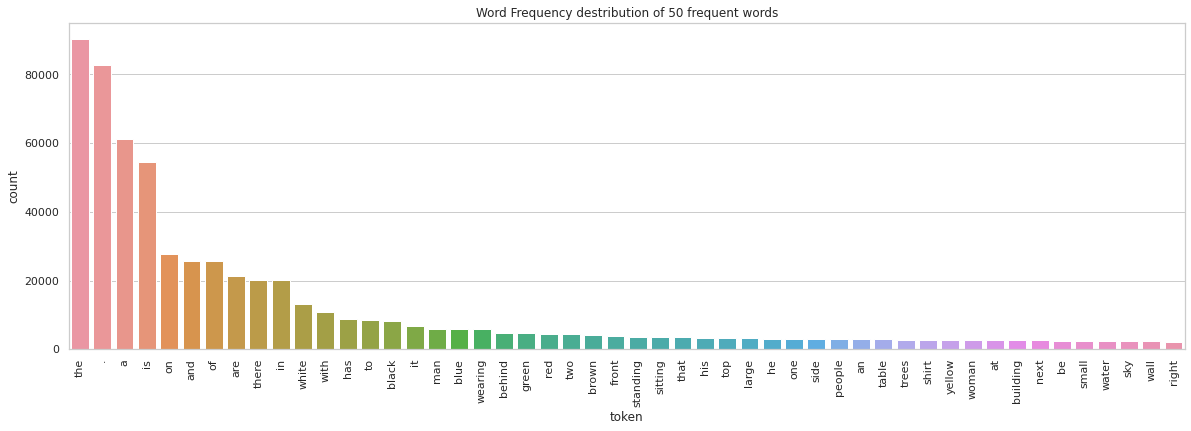

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,6))
sns.barplot(x="token", y="count", data=tokenCount[:50])
plt.xticks(rotation='vertical')
plt.title("Word Frequency destribution of 50 frequent words")

In [ ]:
countLess = tokenCount[tokenCount['count'] < 5]
countLess.head(10)

,token,count
6594,hints,4
6590,de,4
7863,protected,4
7856,bulky,4
2267,barbecue,4
4281,traces,4
4353,allowing,4
4792,writer,4
4807,moved,4
7868,ac,4


Text(0.5, 1.0, 'Word Frequency Distribution of 50 words with frequency less than 5')

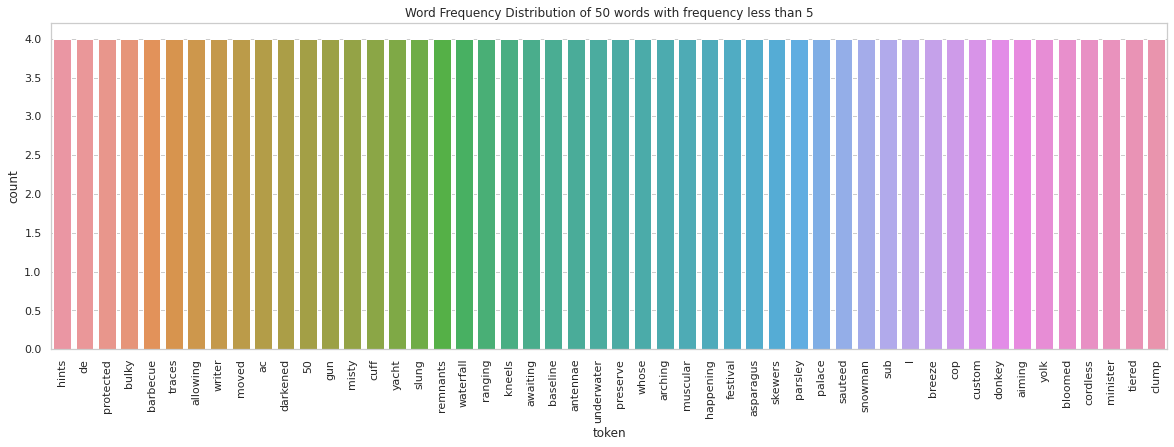

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,6))
sns.barplot(x="token", y="count", data=countLess[:50])
plt.xticks(rotation='vertical') 
plt.title("Word Frequency Distribution of 50 words with frequency less than 5")

In [ ]:
def lengthCaption(captions):
  lengths = list()
  for caption in train_captions:
    tokens = caption.split()
    lengths.append(len(tokens))
  return lengths

lengths_of_captions = lengthCaption(train_captions)



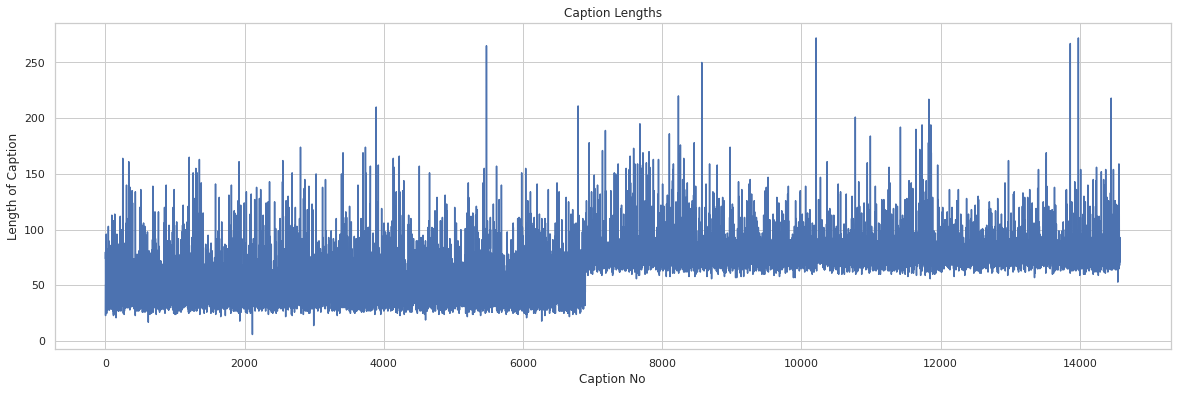

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,6))
plt.plot(np.arange(0,len(lengths_of_captions)),lengths_of_captions)
plt.title("Caption Lengths")
plt.xlabel("Caption No")
plt.ylabel('Length of Caption')
plt.show()